<a href="https://colab.research.google.com/github/EmilianoCastelan/Simulacion1/blob/main/Prueba_promedios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

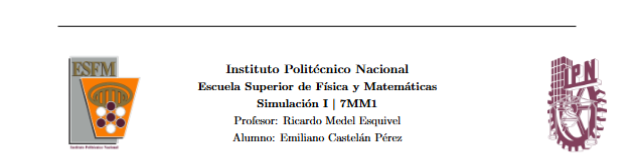

**Prueba de los promedios**

La prueba de los promedios es un procedimiento estadístico que se utiliza para determinar si la media de una muestra es significativamente diferente de un valor específico o de la media de otra muestra.
En este programa utilizaremos las formulas:

$\overline{x}=\frac{x_1+x_2+...+x_N}{N}$

$Z_0=\frac{(\overline{x}-\frac{1}{2})\sqrt{N}}{\sqrt{\frac{1}{12}}}$

Las cuales son los estadísticos de prueba

Y finalmente, para saber si se rechazara o no la hipotesis nula usaremos el criterio $|Z_o|<Z_{\frac{α}{2}}$, con $α$ el nivel de confianza que se le quiera dar

In [2]:
import numpy as np
import random as ran
import statistics as st
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
lista_num = [
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79982, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.88752, 0.33729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49383, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

In [4]:
alpha=float(input("Ingrese el valor de alpha: "))

def prueba_prom():
  x_prom=st.mean(lista_num)
  z0=(x_prom-0.5) * (np.sqrt(len(lista_num)))/(np.sqrt(1/12))
  z_c=stats.norm.ppf(1-alpha/2)

  if np.abs(z0)<z_c:
    print("La hipotesis nula no se rechaza: vienen de una distribución uniforme U(0,1)")
  else:
    print("La hipotesis nula se rechaza: no vienen de una distribución uniforme U(0,1)")

prueba_prom()

Ingrese el valor de alpha: 0.5
La hipotesis nula no se rechaza: vienen de una distribución uniforme U(0,1)


A continuación, modificare el texto para que en lugar de tomar los datos de una lista dentro del codigo, los tome de un archivo en Drive


In [ ]:
ruta = "/content/drive/MyDrive/lista.txt"

with open(ruta, "r") as archivo:
    lista_num = [float(linea.strip()) for linea in archivo]

alpha = float(input("Ingrese el valor de alpha: "))

def prueba_prom(lista_num, alpha):
    x_prom = st.mean(lista_num)
    z0 = (x_prom - 0.5) * (np.sqrt(len(lista_num))) / (np.sqrt(1/12))
    z_c = stats.norm.ppf(1 - alpha/2)

    if np.abs(z0) < z_c:
        print("La hipótesis nula no se rechaza: vienen de una distribución uniforme U(0,1)")
    else:
        print("La hipótesis nula se rechaza: no vienen de una distribución uniforme U(0,1)")

prueba_prom(lista_num, alpha)

Ahora, realizaré una función para clasificar y contar los datos de la lista

In [5]:
def frecuencia(lista_num):
    contador1 = 0
    contador2 = 0
    contador3 = 0
    contador4 = 0
    contador5 = 0
    total=0

    for numero in lista_num:
        if numero < 0.2:
            contador1 += 1
            total+=1
        elif 0.2 <= numero < 0.4:
            contador2 += 1
            total+=1
        elif 0.4 <= numero < 0.6:
            contador3 += 1
            total+=1
        elif 0.6 <= numero < 0.8:
            contador4 += 1
            total+=1
        else:
            contador5 += 1
            total+=1

    return contador1, contador2, contador3, contador4, contador5, total

In [6]:
resultados = frecuencia(lista_num)

print("Intervalo\tFrecuencia")
print("0 - 0.2\t\t", resultados[0])
print("0.2 - 0.4\t", resultados[1])
print("0.4 - 0.6\t", resultados[2])
print("0.6 - 0.8\t", resultados[3])
print("0.8 - 1.0\t", resultados[4])
print("Total de los datos:\t",resultados[5])

Intervalo	Frecuencia
0 - 0.2		 21
0.2 - 0.4	 22
0.4 - 0.6	 19
0.6 - 0.8	 23
0.8 - 1.0	 15
Total de los datos:	 100


Finalmente, realizamos la prueba de bondad y la mostramos en una tabla para apreciar los resultados de forma óptima, donde usaremos las formula $\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$,

In [19]:
resultados = frecuencia(lista_num)

f_observadas = resultados[:5]
total = resultados[5]

# Frecuencia esperada
f_esperada = total / 5

chi_total = 0

intervalos = ["0 - 0.2", "0.2 - 0.4", "0.4 - 0.6", "0.6 - 0.8", "0.8 - 1.0"]

print(f"{'Intervalo':<12}{'O':<8}{'E':<10}{'(O-E)':<10}{'(O-E)^2/E':<12}")

for i in range(5):
    O = f_observadas[i]
    E = f_esperada
    diferencia = O - E
    chi = (diferencia**2) / E
    chi_total += chi

    print(f"{intervalos[i]:<12}{O:<8}{E:<10.2f}{diferencia:<10.2f}{chi:<12.4f}")

print("\nTotal datos:", total)
print("Chi-cuadrada calculada:", round(chi_total,4))

Intervalo   O       E         (O-E)     (O-E)^2/E   
0 - 0.2     21      20.00     1.00      0.0500      
0.2 - 0.4   22      20.00     2.00      0.2000      
0.4 - 0.6   19      20.00     -1.00     0.0500      
0.6 - 0.8   23      20.00     3.00      0.4500      
0.8 - 1.0   15      20.00     -5.00     1.2500      

Total datos: 100
Chi-cuadrada calculada: 2.0


**Conclusión:**

Con un nivel de significancia del 5%, el estadístico $\chi^{2}$ calculado es menor que el valor crítico
Por lo tanto, no se rechaza la hipótesis nula.
No existe evidencia estadística para concluir que los datos no siguen una distribución uniforme